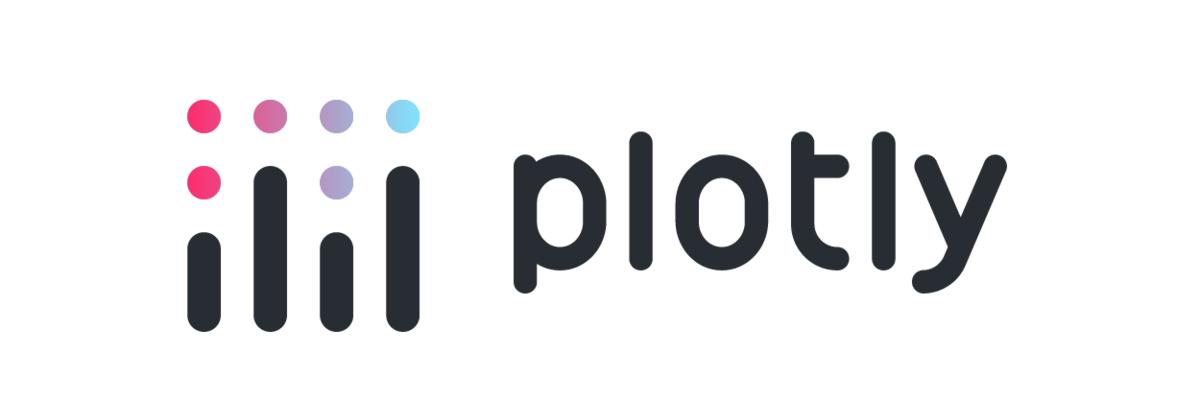

**<h1>Plotly Open Source Graphing Library for Python</h1>**

**<h2>Авторки: Сидорчук Ярослава та Балагура Софія<h2>**

**Installation**

In [ ]:
pip install plotly==5.14.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 98.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


**Import**

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

**Examples**

In [ ]:
contries = px.data.gapminder()
contries.sort_values('pop', ascending=False).groupby('continent').first()


,country,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
continent,,,,,,,
Africa,Nigeria,2007,46.859,135031164,2013.977305,NGA,566
Americas,United States,2007,78.242,301139947,42951.653090,USA,840
Asia,China,2007,72.961,1318683096,4959.114854,CHN,156
Europe,Germany,2007,79.406,82400996,32170.374420,DEU,276
Oceania,Australia,2007,81.235,20434176,34435.367440,AUS,36


In [ ]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Americas'").query("pop > 10.e6")
fig = px.pie(df, values='pop', names='country', title='кольорова секторна діаграма з населенням Америки', color_discrete_sequence = px.colors.sequential.Pinkyl)
#кольори: Agsunset, Plasma, Pinkyl
fig.show()

In [ ]:
labels = ["Asia", "Europe", "Africa", "Americas", "Oceania"]

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['1980', '2007'])
fig.add_trace(go.Pie(labels=labels, values=[4, 7, 1, 7, 0.5], scalegroup='one',
                     name="World GDP 1980"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[21, 15, 3, 19, 1], scalegroup='one',
                     name="World GDP 2007"), 1, 2)

fig.update_layout(title_text='Світовий ВВП')
fig.show()

In [ ]:
companies = px.data.stocks()
companies.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [ ]:
fig = px.line(companies, x='date', y="AMZN", markers=True, title="часовий ряд, який ілюструє зміни вартості акцій компанії Amazon")
fig.show()

In [ ]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
fig = px.scatter(df, x = 'country', y = 'pop', title = 'точкова діаграма, яка демонструє країну Європи та її населення')
fig.update_traces(marker=dict(size=16, line=dict(width=2, color='black')), selector=dict(mode='markers'))
fig.show()

In [ ]:
df_europe = px.data.gapminder().query("year == 2007").query("continent == 'Europe'").query("pop > 10.e6")
fig = px.bar(df_europe, y='pop', x='country', text='pop', color=df_europe['gdpPercap'].sort_values(ascending=True),
             title = 'стовпчасті діаграми, які показують країни Європи з населенням більше 10 млн, посортовані за зростанням ВВП, що проілюстровано різними кольорами')
fig.show()

In [ ]:
df_europe = px.data.gapminder().query("year == 2007").query("continent == 'Europe'").query("pop > 10.e6")
fig = px.bar(df_europe, y=df_europe['pop'].sort_values(ascending=True), x='country', text='pop', color='gdpPercap',
             title = 'стовпчасті діаграми, які показують країни Європи з населенням більше 10 млн, посортовані за зростанням населення і проілюстровані різними кольорами, які показують ВВП')
fig.show()

In [ ]:
df = px.data.gapminder().query("continent == 'Europe'").query("pop > 10.e6")
fig = px.line(df, x='pop', y='year', color='country', markers=True,
              title = 'лінійні діаграми, що показують зміну населення країн Європи, з маркерами')
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Лінійна функція", "Квадратична функція", "Кубічна функція", "Обернена пропорційність"))

x = np.arange(-30, 30)

fig.add_trace(go.Scatter(x=x, y=x**1),
              row=1, col=1)

fig.add_trace(go.Scatter(x=x, y=x**2, mode='markers'),
              row=1, col=2)

fig.add_trace(go.Scatter(x=x, y=x**3),
              row=2, col=1)

fig.add_trace(go.Scatter(x=x, y=1/x),
              row=2, col=2)

fig.update_layout(showlegend=False, title="Демонстрація різних графіків, заданих одночасно")

fig.show()

<ipython-input-12-eb957befc539>:15: RuntimeWarning:

divide by zero encountered in true_divide



In [ ]:
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, locations="iso_alpha",
                     color="continent",
                     hover_name="country",
                     size="pop",
                     projection="orthographic",
                     title="точкова діаграма на мапі Землі з населенням країн")
fig.show()

In [ ]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="pop", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[5e6,500e6],
           title="точковий графік зі слайдером та анімацією, який демонструє зміну населення та ВВП країн у період з 1952 по 2007 рр.")

fig.show()